In [47]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_df=pd.read_csv(city_data_to_load).dropna()
ride_df=pd.read_csv(ride_data_to_load).dropna()

# Combine the data into a single dataset
city_ride_df=pd.merge(ride_df, city_df, on="city", how="left")

# Display the data table for preview
city_ride_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [68]:
#Obtain the x and y coordinates for each of the three city types
#Create 3 dataframes based on city type
urban_city = city_ride_df.loc[(city_ride_df["type"] == "Urban")]
suburban_city = city_ride_df.loc[(city_ride_df["type"] == "Suburban")]
rural_city = city_ride_df.loc[(city_ride_df["type"] == "Rural")]

#Find the average fare per city
avg_fare_urban = urban_city.groupby(['city'])['fare'].mean()
avg_fare_rural = rural_city.groupby(['city'])['fare'].mean()
avg_fare_suburban = suburban_city.groupby(['city'])['fare'].mean()

#Find the number of drivers per city
drivers_urban = urban_city.groupby(['city'])['driver_count'].mean()
drivers_rural = rural_city.groupby(['city'])['driver_count'].mean()
drivers_suburban = suburban_city.groupby(['city'])['driver_count'].mean()

#Find the number of rides per city
rides_urban = urban_city.groupby(['city']).count()['ride_id']
rides_rural = rural_city.groupby(['city']).count()['ride_id']
rides_suburban = suburban_city.groupby(['city']).count()['ride_id']

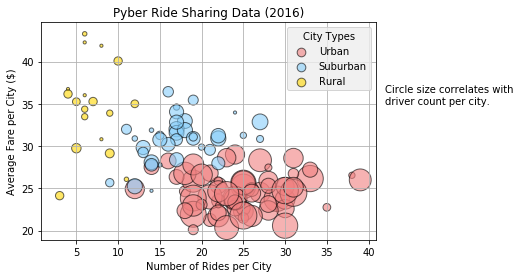

In [70]:
# Create scatter plots for Urban, Suburban and Rural cities
plt.scatter(rides_urban, avg_fare_urban, s=drivers_urban*10,
            marker ='o', facecolors ="lightcoral", edgecolors='black', alpha = 0.6, label="Urban")

plt.scatter(rides_suburban, avg_fare_suburban, s=drivers_suburban*10,
            marker ='o', facecolors ="lightskyblue", edgecolors='black', alpha = 0.6, label="Suburban")

plt.scatter(rides_rural, avg_fare_rural, s=drivers_rural*10,
            marker ='o', facecolors ="gold", edgecolors='black', alpha = 0.6, label="Rural")

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Number of Rides per City")
plt.ylabel("Average Fare per City ($)")

# Show grid
plt.grid()

# Create a legend
legend = plt.legend(title= "City Types", loc="upper right")
frame = legend.get_frame()
frame.set_facecolor('#eeeeee')

# Make legend circles uniform size
legend.legendHandles[0]._sizes = [75]
legend.legendHandles[1]._sizes = [75]
legend.legendHandles[2]._sizes = [75]

# Incorporate a text label regarding circle size
plt.text(42,35,"Circle size correlates with\ndriver count per city.", fontsize = 10)

# Save Figure to data folder in local dir
plt.savefig('pyberscatterplot.png')

# Display the plot
plt.show()

## Total Fares by City Type

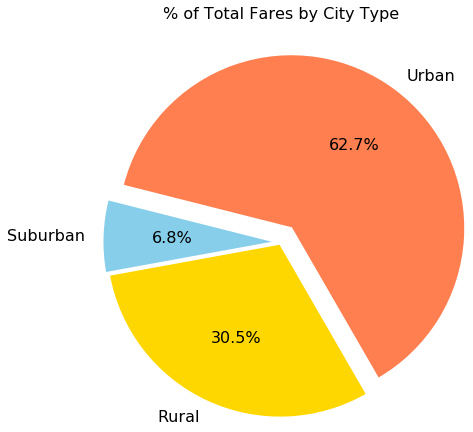

In [75]:
# Calculate Type Percents
# Collect sum of fares per city type
sum_fare_urban = urban_city["fare"].sum()
sum_fare_rural = rural_city["fare"].sum()
sum_fare_suburban = suburban_city["fare"].sum()

# Build Pie Chart
labels = ["Urban", "Suburban", "Rural"]
plt.title("% of Total Fares by City Type", fontsize=16,y=1.5)
colors = ["coral", "skyblue", "gold"]
explode = (0.2, .05, .02)

sizes = [sum_fare_urban, sum_fare_rural, sum_fare_suburban]

plt.pie(sizes, 
        explode=explode,
        radius=2, 
        labels=labels, 
        colors=colors, 
        autopct="%1.1f%%", 
        startangle=300,  
        textprops={'fontsize': 16}, 
        wedgeprops = {'linewidth': 2, 'edgecolor':'white'})

# Save Figure to data folder in local dir
plt.savefig('totalfaresbycity.png', bbox_inches="tight")

# Display the plot
plt.show()

## Total Rides by City Type

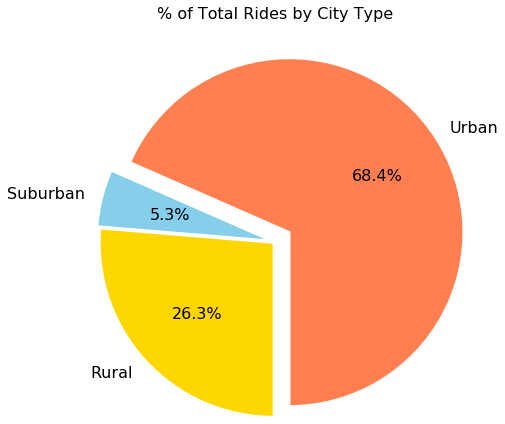

In [84]:
# Calculate Ride Percents
ride_count_urban = urban_city["ride_id"].count()
ride_count_rural = rural_city["ride_id"].count()
ride_count_suburban = suburban_city["ride_id"].count()

# Build Pie Chart
labels = ["Urban", "Suburban", "Rural"]
plt.title("% of Total Rides by City Type", fontsize=16,y=1.5)
colors = ["coral", "skyblue", "gold"]
explode = (0.2, .05, .02)

sizes = [ride_count_urban, ride_count_rural, ride_count_suburban]

plt.pie(sizes, 
        explode=explode,
        radius=2, 
        labels=labels, 
        colors=colors, 
        autopct="%1.1f%%", 
        startangle=270,  
        textprops={'fontsize': 16}, 
        wedgeprops = {'linewidth': 2, 'edgecolor':'white'})

# Save Figure to data folder in local dir
plt.savefig('totalridesbycity.png', bbox_inches="tight")

# Display the plot
plt.show()


## Total Drivers by City Type

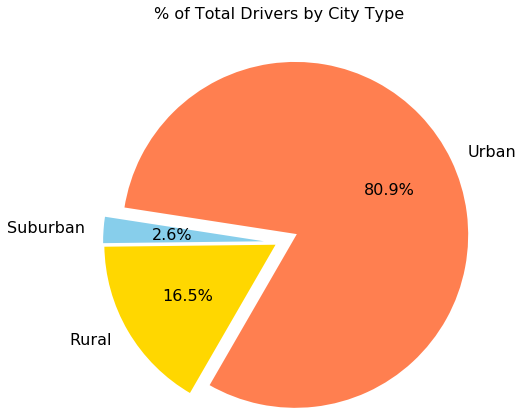

In [91]:
# Calculate Driver Percents
driver_count_urban = urban_city.groupby("city")["driver_count"].mean().sum()
driver_count_rural = rural_city.groupby("city")["driver_count"].mean().sum()
driver_count_suburban = suburban_city.groupby("city")["driver_count"].mean().sum()

# Build Pie Charts
labels = ["Urban", "Suburban", "Rural"]
plt.title("% of Total Drivers by City Type", fontsize=16,y=1.5)
colors = ["coral", "skyblue", "gold"]
explode = (0.2, .04, .03)

sizes = [driver_count_urban, driver_count_rural, driver_count_suburban]

plt.pie(sizes, 
        explode=explode,
        radius=2, 
        labels=labels, 
        colors=colors, 
        autopct="%1.1f%%", 
        startangle=240,  
        textprops={'fontsize': 16}, 
        wedgeprops = {'linewidth': 2, 'edgecolor':'white'})

# Save Figure to data folder in local dir
plt.savefig('totaldriversbycity.png', bbox_inches="tight")

# Display the plot
plt.show()
